# Data Exploration for Financial Fraud Detection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sys
import os
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
from src.utils.preprocessing import DataPreprocessor


# Load data
try:
    df = joblib.load('../data/processed/creditcard_raw.joblib')
except FileNotFoundError:
    from src.utils.data_loader import DataLoader
    loader = DataLoader()
    df = loader.load_creditcard_data()

# Basic info
print(f"Dataset shape: {df.shape}")
print(f"Fraud rate: {df['Class'].mean()*100:.2f}%")
df.head()

Dataset shape: (284807, 31)
Fraud rate: 0.17%


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Class Distribution

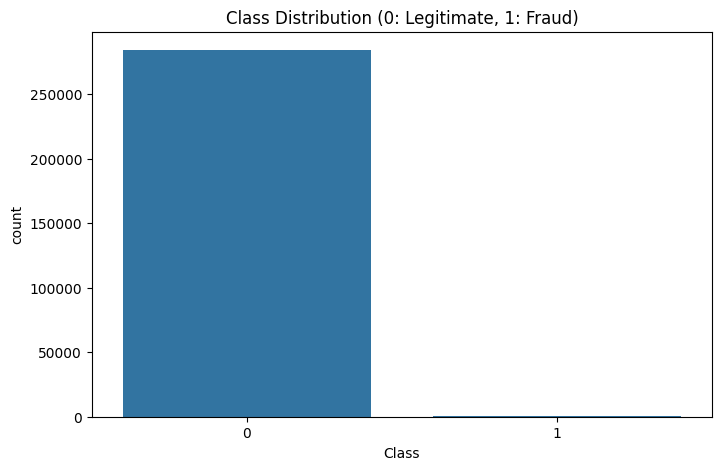

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show()

## Transaction Amount Analysis

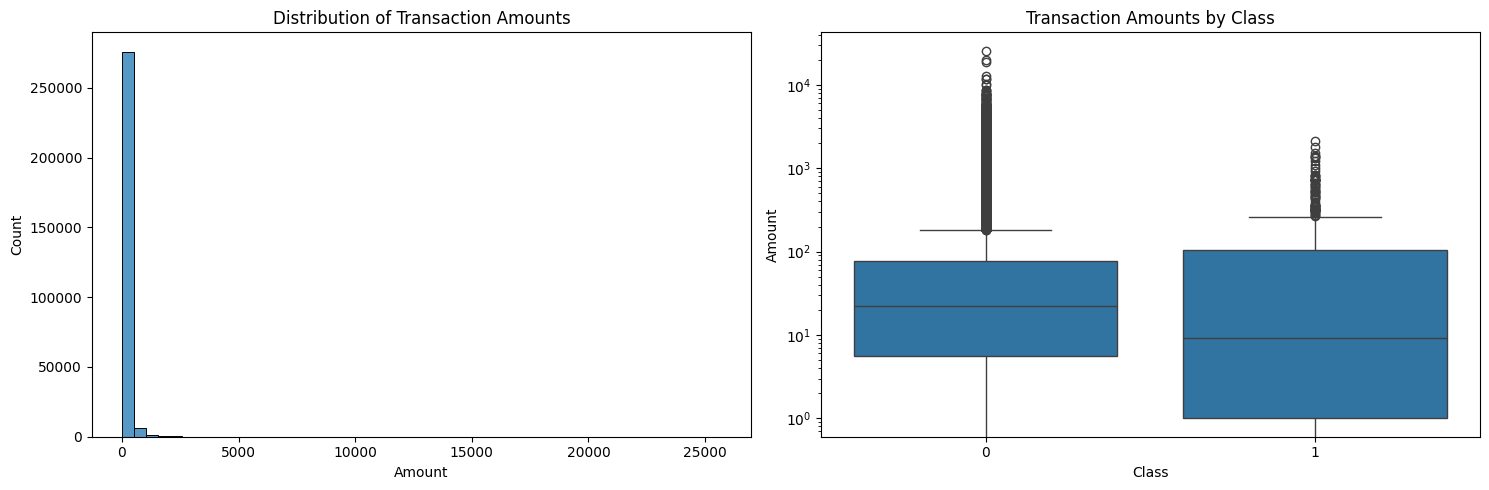

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of transaction amounts
sns.histplot(df['Amount'], bins=50, ax=axes[0])
axes[0].set_title('Distribution of Transaction Amounts')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Count')

# Transaction amounts by class
sns.boxplot(x='Class', y='Amount', data=df, ax=axes[1])
axes[1].set_title('Transaction Amounts by Class')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

## Time Analysis

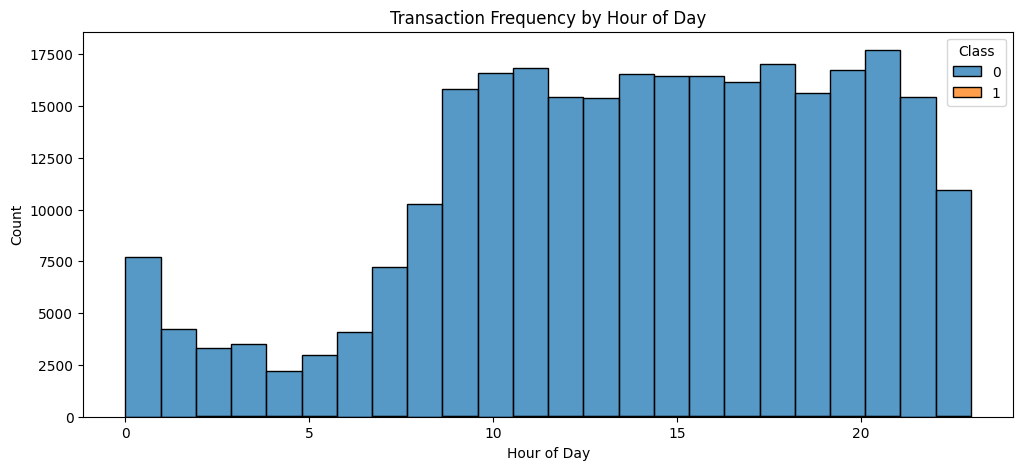

In [6]:
# Convert Time to hours
df['Time_hour'] = df['Time'] % (24 * 3600) // 3600

plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Time_hour', hue='Class', bins=24, multiple='stack')
plt.title('Transaction Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

## Correlation Analysis

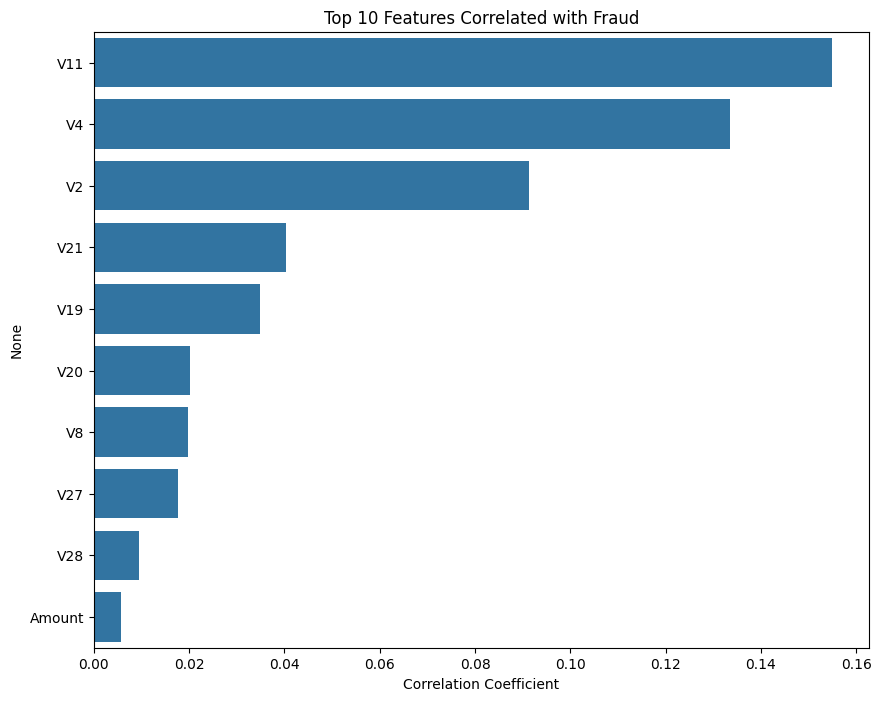

In [7]:
# Calculate correlations with Class
correlations = df.corr()['Class'].sort_values(ascending=False)

# Plot top correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations[1:11].values, y=correlations[1:11].index)
plt.title('Top 10 Features Correlated with Fraud')
plt.xlabel('Correlation Coefficient')
plt.show()

## Feature Distributions

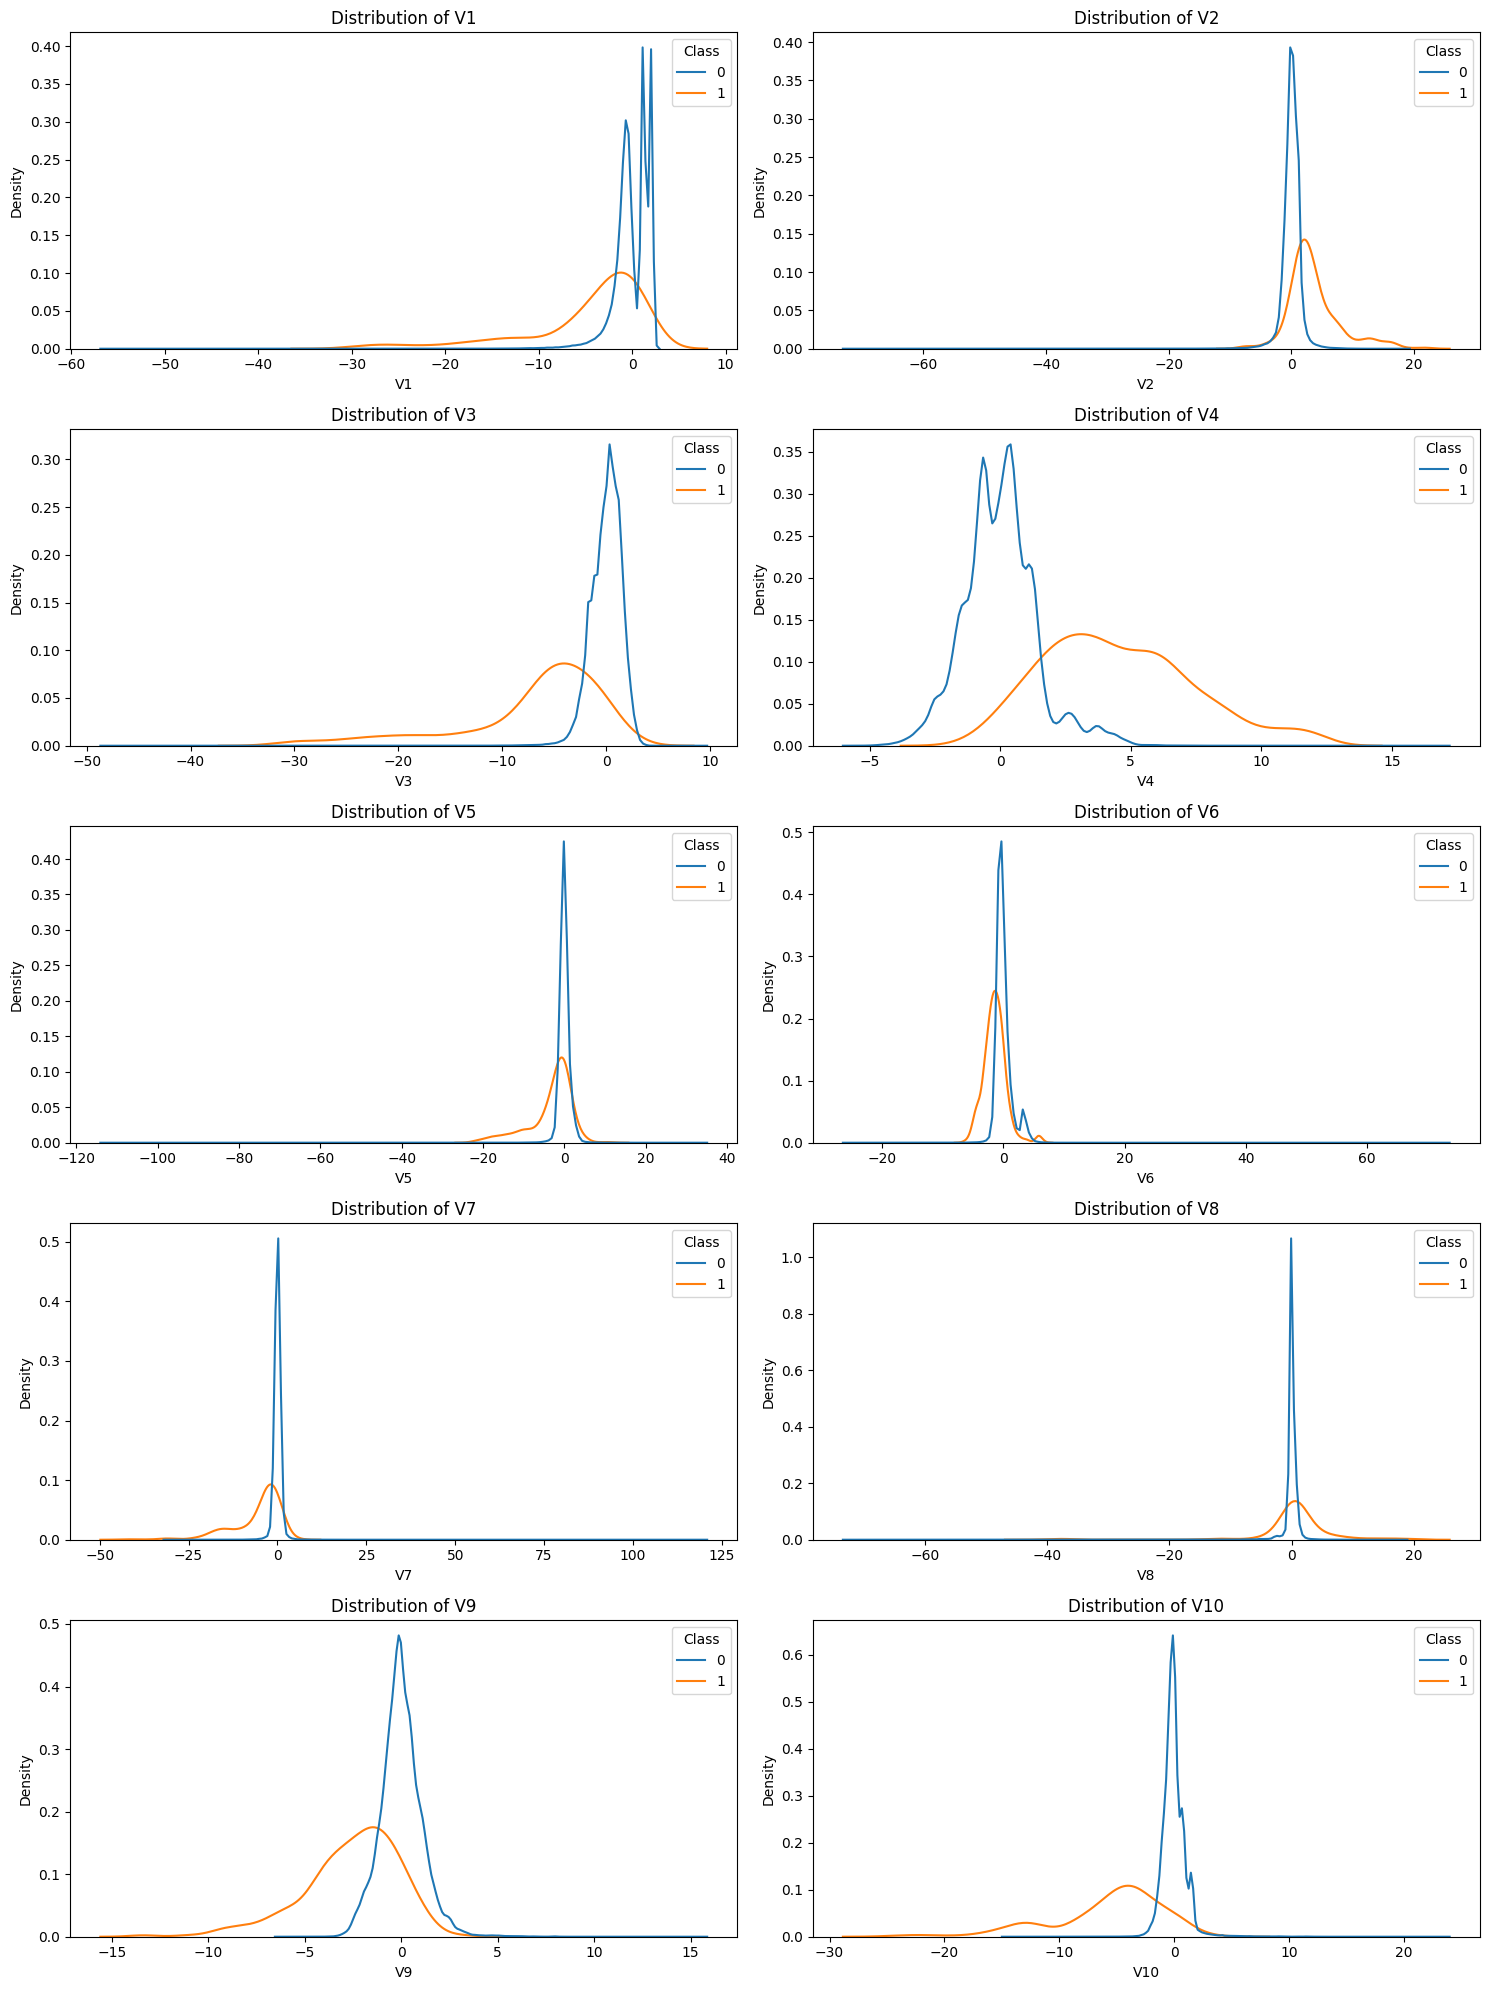

In [10]:
# Plot distributions of PCA components
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(['V%d' % i for i in range(1, 11)]):
    sns.kdeplot(data=df, x=col, hue='Class', ax=axes[i], common_norm=False)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()